In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

In [2]:
# Training 1: updating test set
local_pred_filepath = '../../models/local_models/2022-11-17_23h15m43s/2022-11-17_23h15m43s_predictions.json'
fed_pred_filepath = '../../models/federated_models/2022-11-17_23h17m24s/2022-11-17_23h17m24s_predictions.json'

In [3]:
with open(local_pred_filepath) as json_file:
    df_pred_local = pd.DataFrame(json.load(json_file))
df_pred_local.head()

,y_pred,y_true,round_number,site_number
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",1,1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",1,2
2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...",2,1
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",2,2


In [4]:
with open(fed_pred_filepath) as json_file:
    df_pred_fed = pd.DataFrame(json.load(json_file))
df_pred_fed.head()

,y_pred,y_true,round_number,site_number
0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",1,1
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]",1,2
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]",2,1
3,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",2,2


In [5]:
def get_extra_metrics(df):
    all_metrics = []
    for y_pred, y_true in zip(df['y_pred'], df['y_true']):
        metrics = {'accuracy_score': accuracy_score(y_true, y_pred),
                   'balanced_accuracy_score': balanced_accuracy_score(y_true, y_pred),
                   'recall_score': recall_score(y_true, y_pred),
                   'precision_score': precision_score(y_true, y_pred),
                   'f1_score': f1_score(y_true, y_pred),
                   'roc_auc_score': roc_auc_score(y_true, y_pred),
                   }
        all_metrics.append(metrics)
    return pd.concat([df, pd.DataFrame(all_metrics)], axis=1)

df_metrics_local = get_extra_metrics(df_pred_local)
df_metrics_local

C:\Users\weld.c\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,y_pred,y_true,round_number,site_number,accuracy_score,balanced_accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",1,1,0.562500,0.515873,0.142857,0.5,0.222222,0.515873
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...",1,2,0.590909,0.500000,0.000000,0.0,0.000000,0.500000
2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...",2,1,0.411765,0.250000,0.000000,0.0,0.000000,0.250000
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",2,2,0.545455,0.545455,0.090909,1.0,0.166667,0.545455


In [6]:
df_metrics_fed = get_extra_metrics(df_pred_fed)
df_metrics_fed

C:\Users\weld.c\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,y_pred,y_true,round_number,site_number,accuracy_score,balanced_accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
0,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",1,1,0.384615,0.425,0.6,0.333333,0.428571,0.425
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]",1,2,0.500000,0.600,1.0,0.428571,0.600000,0.600
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0]",2,1,0.500000,0.500,0.0,0.000000,0.000000,0.500
3,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",2,2,0.636364,0.600,0.2,1.000000,0.333333,0.600


In [7]:
def plot_metric_by_site(df_metrics_local, df_metrics_fed, 
                        eval_metric='accuracy_score', x_metric='round_number', split_by='site_number',
                        title='site number:', figsize=(10, 10)):

    plt.figure(figsize=figsize)
    n_plots = len(df_metrics_local[split_by].unique())
    for split_val in df_metrics_local[split_by].unique():
        plt.subplot(n_plots, 1, split_val)
        plt.title(f'{title} {split_val}')

        df_tmp_local = df_metrics_local[df_metrics_local[split_by] == split_val]
        df_tmp_fed = df_metrics_fed[df_metrics_fed[split_by] == split_val]

        plt.plot(df_tmp_local[x_metric], df_tmp_local[eval_metric], marker='s', alpha=0.75, label=f'local')
        plt.plot(df_tmp_fed[x_metric], df_tmp_fed[eval_metric], marker='s', alpha=0.75, label=f'federated')
        plt.legend()
        plt.ylabel(eval_metric)
        plt.xticks([i+1 for i in range(n_plots)], df_metrics_local[split_by].unique())
    plt.xlabel(x_metric)
    plt.tight_layout()
    plt.show()


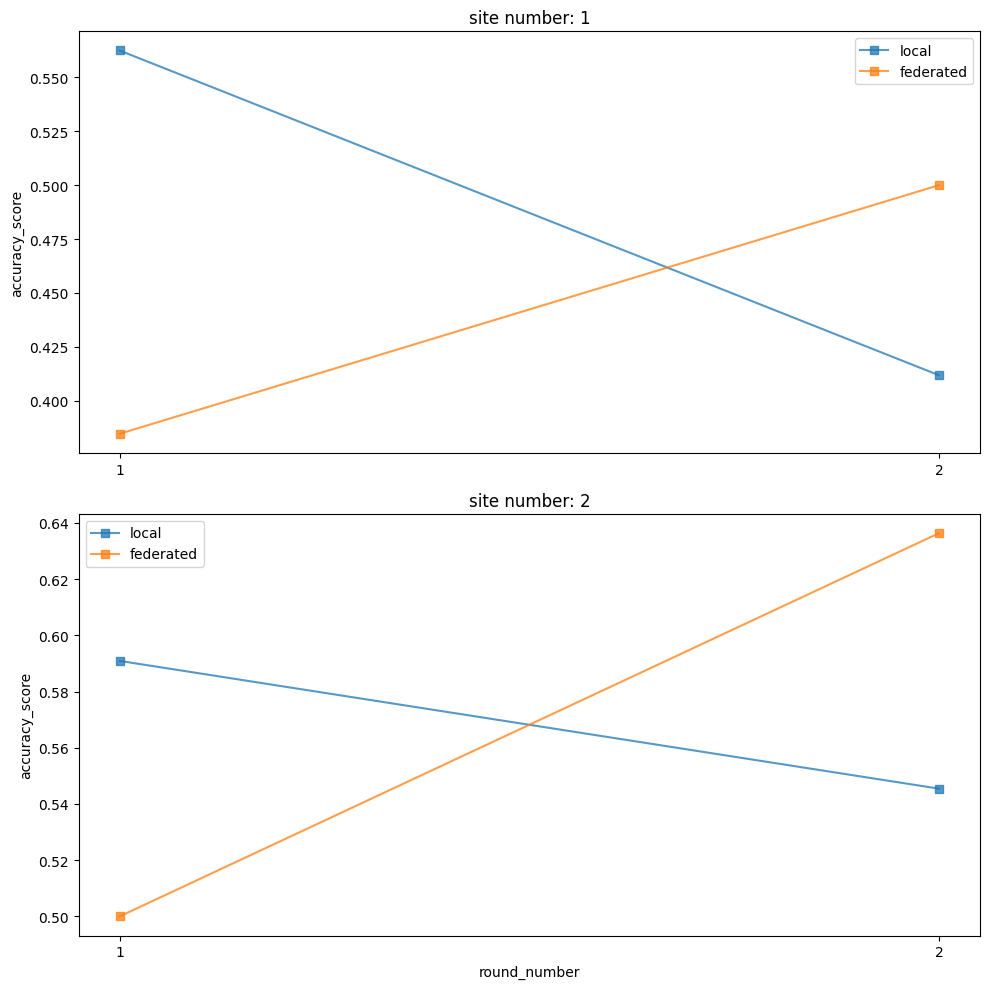

In [8]:
plot_metric_by_site(df_metrics_local, df_metrics_fed, eval_metric='accuracy_score')

In [9]:
# plot_metric_by_site(df_metrics_local, df_metrics_fed, eval_metric='balanced_accuracy_score')

In [10]:
# plot_metric_by_site(df_metrics_local, df_metrics_fed, eval_metric='f1_score')